In [1]:
import pandas as pd
import scanpy as sc
import numpy as np
from numpy import linalg as la
from scipy.sparse import issparse
import loompy
import anndata
import scvelo as scv
scv.logging.print_version()

Running scvelo 0.2.4 (python 3.8.13) on 2024-08-19 18:01.


In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80,dpi_save=300, facecolor='white')

scanpy==1.9.1 anndata==0.9.2 umap==0.5.2 numpy==1.20.0 scipy==1.8.0 pandas==1.4.2 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.9.9 pynndescent==0.5.6


In [3]:
import scanpy.external as sce

In [4]:
import os
os.chdir('D:/KP/EKP_RKP')

In [5]:
# Cell Phase
import numpy as np
import pandas as pd
import anndata as ad
import os.path
import scanpy as sc
from matplotlib import pyplot as plt

h5ad_file = "D:/KP/EKP_RKP/processed_with_scvelo_info_RKP.h5ad"
out_dir = os.path.dirname(h5ad_file) + "/CellPhase"
os.makedirs(out_dir, exist_ok = True)
edata = sc.read_h5ad(h5ad_file)

wt_color_dict = {'G1': 'salmon', 'G2/M': 'darkorange', 'S': 'darkgreen'}

In [6]:
adata = sc.read('processed_with_scvelo_info_RKP.h5ad')
adata

AnnData object with n_obs × n_vars = 1115 × 20470
    obs: 'batch', 'sample_batch', 'tissue', 'type', 'leiden', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rpl', 'pct_counts_rpl', 'total_counts_rps', 'pct_counts_rps', 'scvelo_leiden', 'velocity_length', 'celltype'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'rpl', 'rps', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std'
    uns: 'EKP_RKP_Tumor_rank_fgsea', 'Leiden_Tumor_rank_fgsea', 'celltype_colors', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'scvelo_leiden_colors', 'scvelo_umap', 'tissue_colors', 'type_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_scvelo_umap', 'X_umap', 'velocity_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [7]:
# Capitalize genes because the dataset is from mouse
cell_cycle_genes = [x.strip().capitalize() for x in open('D:/KP/cell_cycle_vignette_files/regev_lab_cell_cycle_genes.txt')]
cell_cycle_genes

['Mcm5',
 'Pcna',
 'Tyms',
 'Fen1',
 'Mcm2',
 'Mcm4',
 'Rrm1',
 'Ung',
 'Gins2',
 'Mcm6',
 'Cdca7',
 'Dtl',
 'Prim1',
 'Uhrf1',
 'Mlf1ip',
 'Hells',
 'Rfc2',
 'Rpa2',
 'Nasp',
 'Rad51ap1',
 'Gmnn',
 'Wdr76',
 'Slbp',
 'Ccne2',
 'Ubr7',
 'Pold3',
 'Msh2',
 'Atad2',
 'Rad51',
 'Rrm2',
 'Cdc45',
 'Cdc6',
 'Exo1',
 'Tipin',
 'Dscc1',
 'Blm',
 'Casp8ap2',
 'Usp1',
 'Clspn',
 'Pola1',
 'Chaf1b',
 'Brip1',
 'E2f8',
 'Hmgb2',
 'Cdk1',
 'Nusap1',
 'Ube2c',
 'Birc5',
 'Tpx2',
 'Top2a',
 'Ndc80',
 'Cks2',
 'Nuf2',
 'Cks1b',
 'Mki67',
 'Tmpo',
 'Cenpf',
 'Tacc3',
 'Fam64a',
 'Smc4',
 'Ccnb2',
 'Ckap2l',
 'Ckap2',
 'Aurkb',
 'Bub1',
 'Kif11',
 'Anp32e',
 'Tubb4b',
 'Gtse1',
 'Kif20b',
 'Hjurp',
 'Cdca3',
 'Hn1',
 'Cdc20',
 'Ttk',
 'Cdc25c',
 'Kif2c',
 'Rangap1',
 'Ncapd2',
 'Dlgap5',
 'Cdca2',
 'Cdca8',
 'Ect2',
 'Kif23',
 'Hmmr',
 'Aurka',
 'Psrc1',
 'Anln',
 'Lbr',
 'Ckap5',
 'Cenpe',
 'Ctcf',
 'Nek2',
 'G2e3',
 'Gas2l3',
 'Cbx5',
 'Cenpa']

In [8]:
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]

In [9]:
g2m_genes

['Hmgb2',
 'Cdk1',
 'Nusap1',
 'Ube2c',
 'Birc5',
 'Tpx2',
 'Top2a',
 'Ndc80',
 'Cks2',
 'Nuf2',
 'Cks1b',
 'Mki67',
 'Tmpo',
 'Cenpf',
 'Tacc3',
 'Fam64a',
 'Smc4',
 'Ccnb2',
 'Ckap2l',
 'Ckap2',
 'Aurkb',
 'Bub1',
 'Kif11',
 'Anp32e',
 'Tubb4b',
 'Gtse1',
 'Kif20b',
 'Hjurp',
 'Cdca3',
 'Hn1',
 'Cdc20',
 'Ttk',
 'Cdc25c',
 'Kif2c',
 'Rangap1',
 'Ncapd2',
 'Dlgap5',
 'Cdca2',
 'Cdca8',
 'Ect2',
 'Kif23',
 'Hmmr',
 'Aurka',
 'Psrc1',
 'Anln',
 'Lbr',
 'Ckap5',
 'Cenpe',
 'Ctcf',
 'Nek2',
 'G2e3',
 'Gas2l3',
 'Cbx5',
 'Cenpa']

In [10]:
cell_cycle_genes = [x for x in cell_cycle_genes if x in adata.var_names]

In [11]:
sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)

calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    557 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    731 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


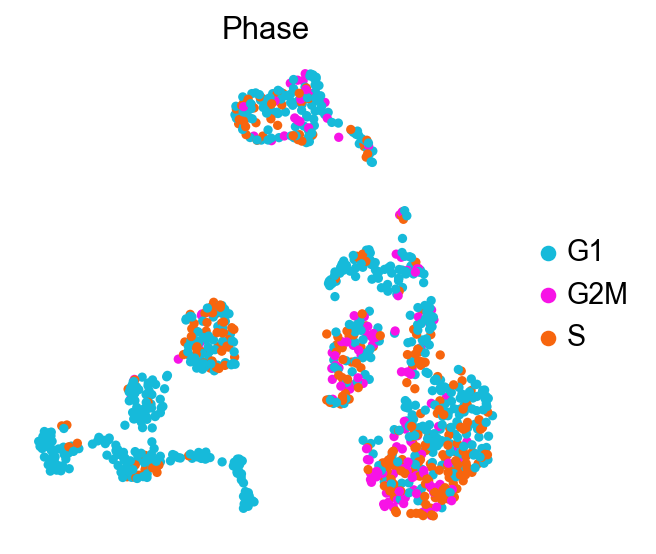

In [14]:
adata.uns["phase_colors"] = ['#16BADA', '#f713e6', '#f7650e']
sc.pl.umap(adata, color=['phase'], legend_loc='right margin', frameon=False, size=70, title='Phase', use_raw=False, save="_RKP_cell_cycle.pdf")

In [16]:
adata.obs.celltype = adata.obs.celltype.astype('category') 

In [ ]:
sc.pl.dotplot(adata, ['phase'], groupby='celltype')

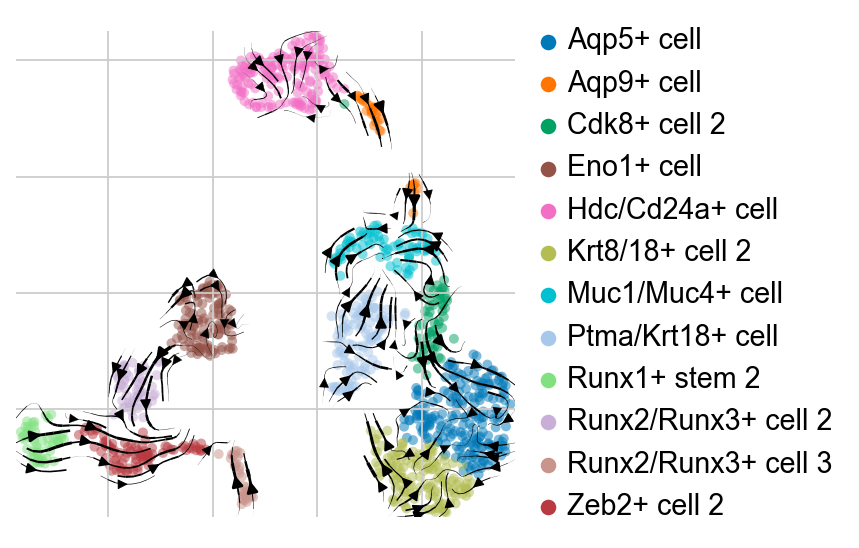

In [13]:
scv.pl.velocity_embedding_stream(adata, basis='umap', color=['celltype'],palette=["#0079b9", "#ff7500","#00a163","#955348",
                                                                                    "#f36fc6","#b3bd51","#00c0d1","#a8c8eb",
                                                                                   "#81e180","#c9afd8","#c9948b","#b93a40"],
                                 size=80, legend_loc='right margin',alpha=0.5, title='', use_raw=False, frameon=False)#,  save='_in_RKP_by_celltype_color_changed.png')